# An Exploratory Analysis on Cleveland Heart Disease Data 

### DSCI100 Project Proposal - Group 36
By Michael Guo, Zaina Karmran, Kerie Galvez, and Ci Xu



## Introduction

Heart diseases refer to several types of conditions that affect the heart of an individual. For instance, one of the most common types of heart disease include the coronary artery disease (CAD), which is caused by a buildup of plaque of cholesterol deposits and other substances in the arteries. This buildup causes the diameters of arteries to narrow overtime, blocking blood flow to the heart. Lack of blood flow can also lead to serious life-threatening events, including heart attacks and eventually death. 

In this project, we will create a classification model to determine if we can accurately predict the presence of heart disease within individuals by using the “Heart Disease Data Set” taken from UCI Machine Learning Repository. The data originally contains 76 attributes from 282 subjects from Cleveland, but past published experiments have narrowed it down to a subset of 14 crucial variables. The data set used in this project will be similarly subsetting select variables shown below, containing notable variables such as age, resting heart rate, resting systolic blood pressure, serum cholesterol, number of years as a smoker, and an indicator variable detailing the presence of heart disease.


## Exploratory Data Analysis

**Loading in Libraries:**

In [53]:
library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
options(repr.matrix.max.rows = 6)
set.seed(36)

**Downloading, Cleaning, and Wrangling the Data:**

In [54]:
heart_data_url <- "https://raw.githubusercontent.com/MangoMajestic/dsci100_group_project_data/main/cleveland_crucial_data.csv"
heart_data <- read_csv(heart_data_url) %>%
    mutate(sex = as.factor(sex),
          chest_pain = as.factor(chest_pain),
          fast_blood_sugar = as.factor(fast_blood_sugar),
          rest_elec_res = as.factor(rest_elec_res),
          exer_angina = as.factor(exer_angina),
          peak_exer_slope = as.factor(peak_exer_slope),
          thal = as.factor(thal),
          presence = ifelse(num==0,"No","Yes"))
heart_data

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  chest_pain = col_double(),
  rest_blood_pres = col_double(),
  serum_cholestorol = col_double(),
  fast_blood_sugar = col_double(),
  rest_elec_res = col_double(),
  rest_heart_rate = col_double(),
  max_heart_rate = col_double(),
  exer_angina = col_double(),
  dep_exer = col_double(),
  peak_exer_slope = col_double(),
  flouro_vess = col_double(),
  thal = col_double(),
  smoke_years = col_double(),
  num = col_double()
)



age,sex,chest_pain,rest_blood_pres,serum_cholestorol,fast_blood_sugar,rest_elec_res,rest_heart_rate,max_heart_rate,exer_angina,dep_exer,peak_exer_slope,flouro_vess,thal,smoke_years,num,presence
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
63,1,1,145,233,1,2,60,150,0,2.3,3,0,6,20,0,No
67,1,4,160,286,0,2,64,108,1,1.5,2,3,3,40,2,Yes
67,1,4,120,229,0,2,78,129,1,2.6,2,2,7,35,1,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
58,0,4,130,197,0,0,54,131,0,0.6,2,0,3,0,0,No
57,1,4,110,335,0,0,62,143,1,3.0,2,1,7,15,2,Yes
47,1,3,130,253,0,0,65,179,0,0.0,1,0,3,0,0,No


**Splitting Data into Training and Testing Sets**

In [55]:
#Splitting the Data into Training and Testing Sets
heart_split <- heart_data %>%
    select(age,rest_heart_rate,presence) %>%
    initial_split(prop = 0.75, strata = presence)
heart_train <- training(heart_split)
heart_test <- testing(heart_split) 

**Training Data Summary Statistics**

In [56]:
num_obs <- nrow(heart_train)

#Number & Percent of Observations in Ecah of the 5 Classes in "num"
heart_percent_obs <- heart_train %>%
    group_by(presence) %>%
    summarize(num_count=n(),num_percentage=n()/num_obs*100)
heart_percent_obs

#Number of Rows with Missing Values
heart_NA <- heart_train %>%
    filter(is.na(age)|is.na(rest_heart_rate)|is.na(presence)) %>%
    summarize(rows_missing_values=n(),percent_rows_missing_values=n()/num_obs*100)
heart_NA

`summarise()` ungrouping output (override with `.groups` argument)



presence,num_count,num_percentage
<chr>,<int>,<dbl>
No,118,55.66038
Yes,94,44.33962


rows_missing_values,percent_rows_missing_values
<int>,<dbl>
0,0


**Training Data Visualization**

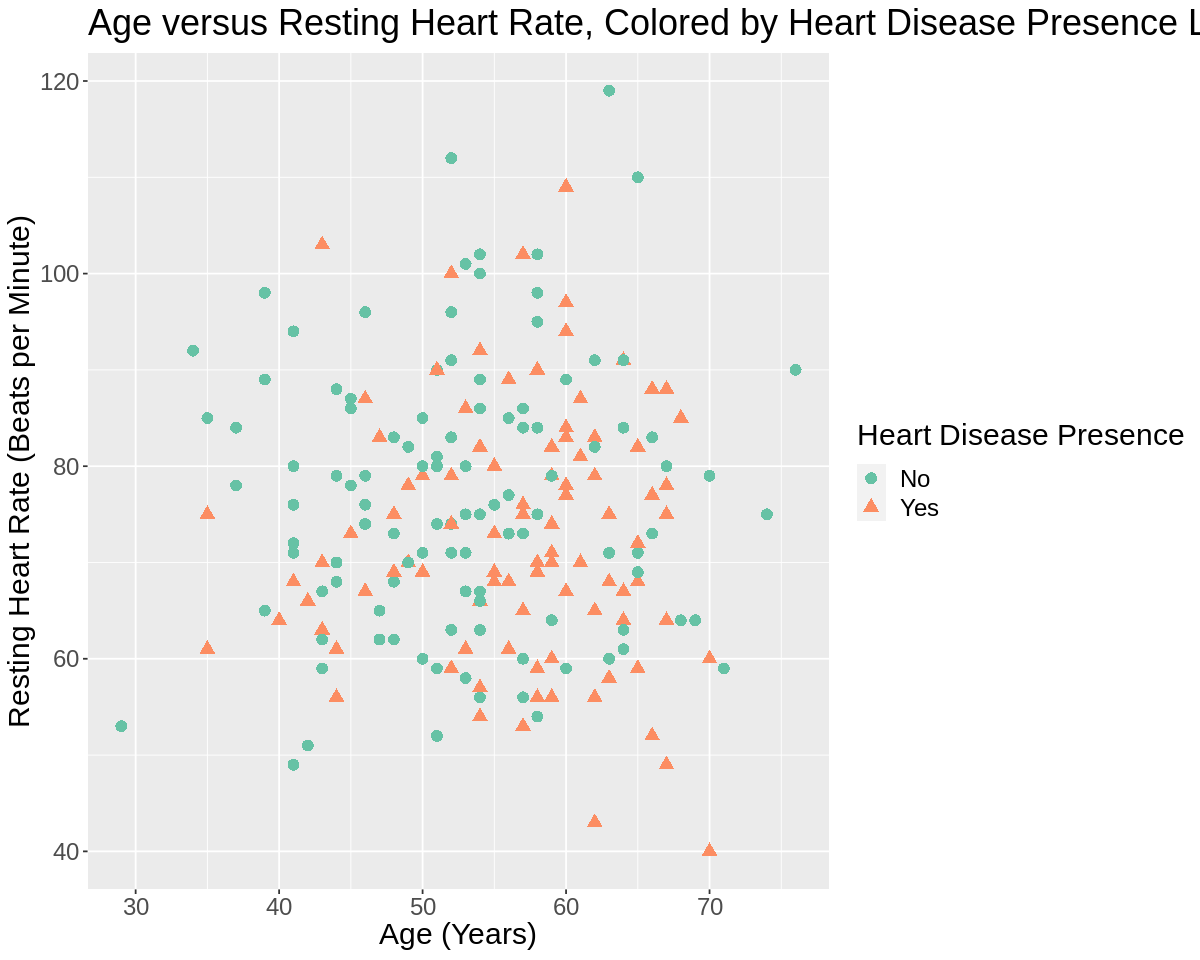

In [61]:
options(repr.plot.width = 10, repr.plot.height = 8)
heart_train_plot <- heart_train %>%
    ggplot(aes(x=age,y=rest_heart_rate,color=presence,shape=presence)) +
    geom_point(size=3) +
    labs(x="Age (Years)",y="Resting Heart Rate (Beats per Minute)",color="Heart Disease Presence",shape="Heart Disease Presence") +
    scale_color_brewer(palette = "Set2") +
    ggtitle("Age versus Resting Heart Rate, Colored by Heart Disease Presence Label") +
    theme(text = element_text(size=18))
heart_train_plot

## Methods

In our analysis, we will be using two predictor variables, namely age and resting heart rate. Our analysis will be based upon the use of tidyverse and tidymodels packages using R machine learning software. We will be using the K-Nearest Neighbors algorithm and cross validation to build and tune the classifier, as well as evaluate its accuracy. We will also be visualising our analysis using categorised scatterplots, filling in the background with the classifier’s predictions to visualise potential classification trends with respect to the predictor variables.


## Expected Outcomes and Significance

The significance of this analysis is to find out the extent of the presence of heart diseases, within individuals of different ages, in Cleveland. Using the subset of 14 collected factors out of 76, the data would be extracted and generalised for the entire population. We hypothesize that heart disease will be diagnosed more likely with age and higher heart rates. Therefore, in our analysis, we are expecting to find a high classification accuracy using the two predictor variables, as we believe that increasing age and higher heart rates may lead to higher chances of heart disease. 

Furthermore, depending on the results from the classifier, the results derived could help doctors and pharmaceuticals to understand and diagnose patients earlier, as well as provide medication which could potentially prevent fatal heart diseases at an early age. We can use more advanced models with more predictor variables to improve the predictability of heart diseases. Depending on the strength of our classifier, future research could delve further into the causality relationship between the predictor variables and the response variable, or explore other factors that may impact the causation of heart diseases.

## Resources

Data Set:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease Retrieved October 25, 2021

Introductory & Background Information on Heart Disease:
https://www.cdc.gov/heartdisease Retrived November 6, 2021